# Practical work on SAR interferometry
 
### Emanuele DALSASSO, Florence TUPIN

Images of the practical work can be found on: 
https://perso.telecom-paristech.fr/dalsasso/TPSAR/

You have:
- Terrasar-X images of metric resolution on Grand canyon in Colorado.
- ERS-1/ERS-2 images acquired on Etna volcano.
For each pair of images, we will compute the interferogram.

Some useful functions are available in the file *mvalab.py*.

### Name: MERCIER Marine

#### Instructions

To solve this practical session, answer the questions below. Then export the notebook with the answers using the menu option **File -> Download as -> Notebook (.ipynb)**. Then [submit the resulting file here](https://partage.imt.fr/index.php/s/Y5iCDRbZrFL2kLe) by next week. 

### Import the libraries and packages we are going to use
The following cell imports all that is going to be necessary for the practical work

In [25]:
!wget https://perso.telecom-paristech.fr/dalsasso/TPSAR/mvalab.py

--2022-02-19 20:51:10--  https://perso.telecom-paristech.fr/dalsasso/TPSAR/mvalab.py
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68071 (66K) [text/x-python]
Saving to: ‘mvalab.py.1’

mvalab.py.1         100%[===================>]  66.48K  --.-KB/s    in 0.1s    

2022-02-19 20:51:11 (469 KB/s) - ‘mvalab.py.1’ saved [68071/68071]



In [26]:
import scipy
from scipy import signal
import scipy.signal
import scipy as spy
import scipy.fftpack
from scipy import ndimage
from scipy import special
from scipy import ndimage
import numpy as np
import math
import matplotlib.pyplot as plt
import mvalab as mvalab
from urllib.request import urlopen
import cmath


plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.max_open_warning'] = 30

## A. Visualization of the Grand Canyon and its interpretation

To recall from the previous practical work:
* Download of images using `mvalab.imz2mat`
* Visualization of amplitude images, phase and Fourier spectrum. Useful functions:
    * `mvalab.visusar`
    * `mvalab.visuinterfero` and `np.angle`
    * `mvalab.visusarspectre`

### Vizualisation of an image 

The function to display a SAR image with an adapted thresholding of the values is 
`mvalab.visusar`. The first argument containing the image is compulsary, and the second one is 
optional and corresponds to a threshold for the display. 
The value $\alpha$ defines the threshold in this way :

${\rm thres} \:\:=\:\: {\rm vmean} \:\: + \:\: \alpha \: {\rm std}$


vmean is the mean value and std the standard deviation computed on the whole image. Every pixel whose value is above this threshold is displayed with the maximal value.  

When $\alpha$ is 0, the image is displayed with the full dynamic range.
A usual value to display SAR images is 3. 

### Vizualisation of a phase image 

Use `mvalab.visuinterfero` on the phase (do not forget the `np.angle` function, and to set the full range dynamic). 

### Spectral analysis 
To visualize an image and its spectrum (with automatic thresholding for the display), use the function `mvalab.visusarspectre`. 


   

In [27]:
url='https://perso.telecom-paristech.fr/dalsasso/TPSAR/imagesinterf/'
imagesar=mvalab.imz2mat(url+'TSX_GC_maitre.cxs')
tableauimage=imagesar[0]
ncol=imagesar[1]
nlig=imagesar[2]

imz2mat : version janvier 2018.  Fichier à ouvrir : https://perso.telecom-paristech.fr/dalsasso/TPSAR/imagesinterf/TSX_GC_maitre.cxs
Nom compatible url
Nom compatible url
Complex short, Fichiers Unix
INFO - reading header/dim : https://perso.telecom-paristech.fr/dalsasso/TPSAR/imagesinterf/TSX_GC_maitre.dim
lecture .dim OK -> largeur:2048 hauteur:2048 profondeur:1
Debug 2 2 2048
2 2048 >h


Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 2048 x 2048


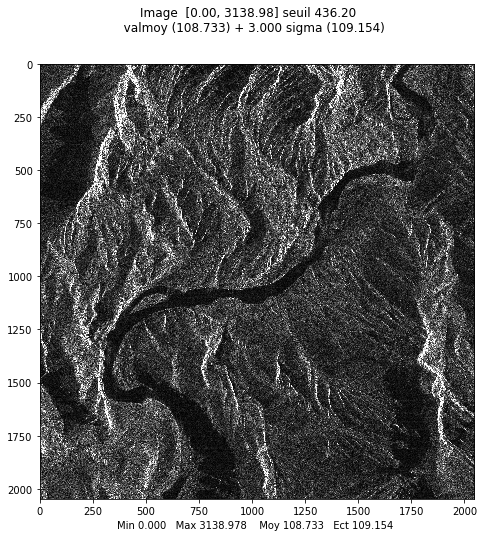

Affichage d'une image reelle
plt.show dans visusar : image 2048 x 2048


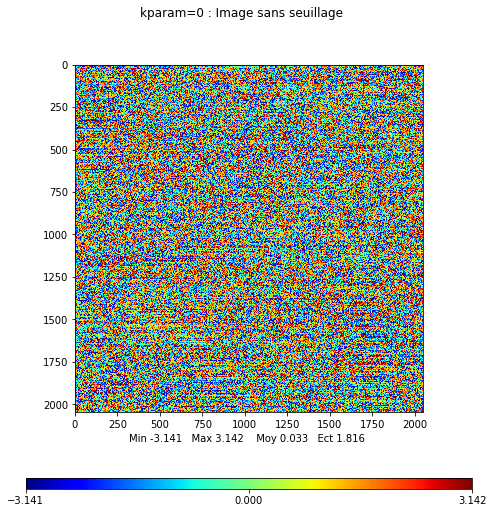

Affichage d'une image complexe : on prend le module
Visusar sans plt.show, ni titre
Affichage d'une image complexe : on prend le module
Visusar sans plt.show, ni titre


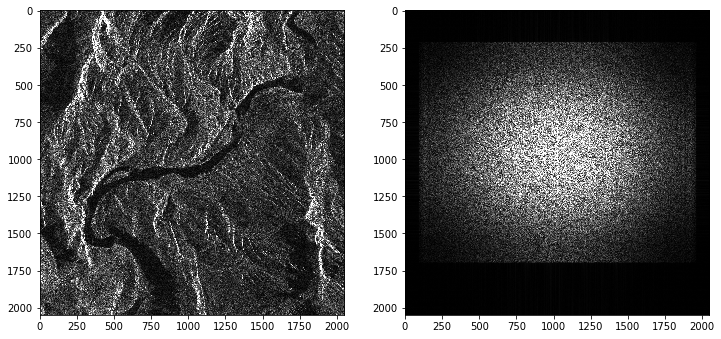

In [28]:
mvalab.visusar(tableauimage)
mvalab.visuinterfero(np.angle(tableauimage),0)
mvalab.visusarspectre(tableauimage)

## B. Terrasar-X data on Grand Canyon (Airbus): computation of the interferogram

##### Parameters values for the TerraSAR-X data 
These are free data provided by Airbus of Grand Canyon, Colorado, US. 
The parameters of the sensor for this acquisition are the following:
- $\theta = 39.15^{\rm o}$  (for the master image)
- $R$ = 646 km  (hypothesis of spheric earth)
- $\lambda$ = 3.11 cm
- $B_{ortho}$ = 46.5 m
- $F_e$ = 109.89 MHz

These values will be used in the following to compute the contribution of the phase ramp corresponding to the orbital fringes. 

### Registration of the two original SAR images: pixellic registration 
The two images to consider are the following:
- TSX_GC_maitre.cxs
- TSX_GC_esclave.cxs

These images are complex images. Thus we have the phase information, which, to recall, is directly linked to the distance between the radar and the ground ($\phi=4\pi R / \lambda$).
They are given in their original geometry of acquisition. 
Thus, they are not directly super-imposable and we must register the slave image on the master one. 

To do a registration at the pixel scale, you can find the maximum of the cross-correlation between the two amplitude images $a_1$ and $a_2$, being the maximum of

$\tilde{a}_1 \star a_2$

with $\tilde{a}_1(i,j) = a_1(-i,-j)$
This is done in the Fourier domain by computing the hermitian product of the two Fourier transforms.
Then the inverse Fourier tansform gives the correlation image:

$\tilde{a_1} \star a_2 = \mathcal{F}^{-1}\{ \mathcal{F}\{a_1\}^{*} \cdot \mathcal{F}\{a_2\} \} $

### Question 1
Compute the translation to apply and give its value. What is the shift you obtain?

We obtain a shift of (9, 12) pixels. 

### Answer 1


imz2mat : version janvier 2018.  Fichier à ouvrir : https://perso.telecom-paristech.fr/dalsasso/TPSAR/imagesinterf/TSX_GC_maitre.cxs
Nom compatible url
Nom compatible url
Complex short, Fichiers Unix
INFO - reading header/dim : https://perso.telecom-paristech.fr/dalsasso/TPSAR/imagesinterf/TSX_GC_maitre.dim
lecture .dim OK -> largeur:2048 hauteur:2048 profondeur:1
Debug 2 2 2048
2 2048 >h
imz2mat : version janvier 2018.  Fichier à ouvrir : https://perso.telecom-paristech.fr/dalsasso/TPSAR/imagesinterf/TSX_GC_slave.cxs
Nom compatible url
Nom compatible url
Complex short, Fichiers Unix
INFO - reading header/dim : https://perso.telecom-paristech.fr/dalsasso/TPSAR/imagesinterf/TSX_GC_slave.dim
lecture .dim OK -> largeur:2048 hauteur:2048 profondeur:1
Debug 2 2 2048
2 2048 >h
Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 2048 x 2048


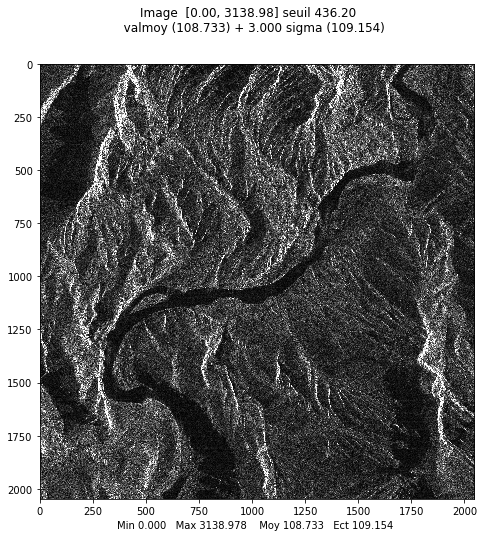

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 2048 x 2048


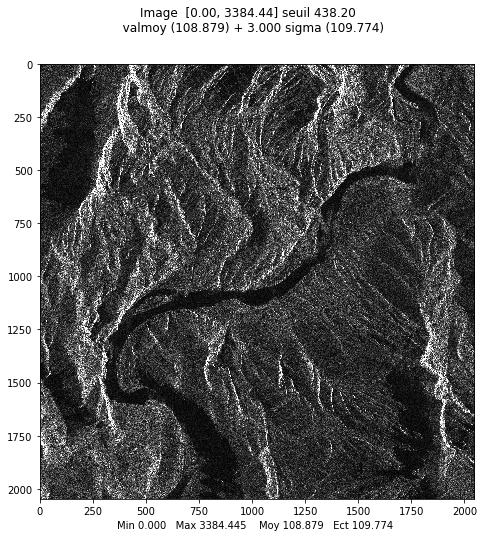

array([[  0.        ,  66.61080993,  22.20360331, ..., 131.487642  ,
        148.33745313,  88.52683209],
       [  0.        ,  36.76955262,  19.02629759, ..., 106.06601718,
        261.72504657, 293.12795841],
       [  0.        ,  78.23042886,  53.07541804, ...,   9.8488578 ,
        171.95929751, 314.24990056],
       ...,
       [  0.        ,  41.59326869,  92.76313923, ...,  94.5409964 ,
        177.07907838, 205.50669089],
       [  0.        ,  75.10659092, 159.76545309, ...,  58.00862005,
        138.3220879 , 213.97429752],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [29]:
url='https://perso.telecom-paristech.fr/dalsasso/TPSAR/imagesinterf/'
imamaster=mvalab.imz2mat(url+'TSX_GC_maitre.cxs')
imaslave = mvalab.imz2mat(url+'TSX_GC_slave.cxs')
mvalab.visusar(imamaster[0])
mvalab.visusar(imaslave[0])

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 200 x 200


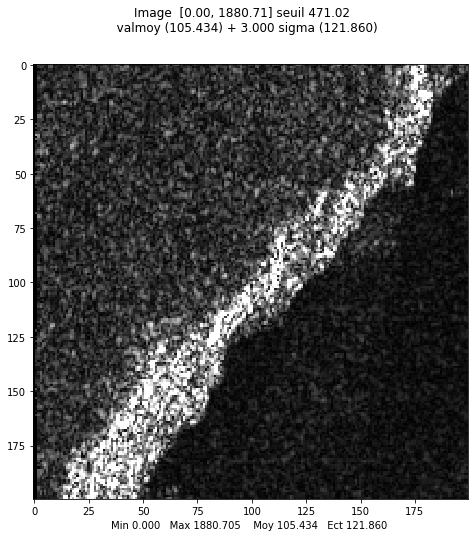

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 200 x 200


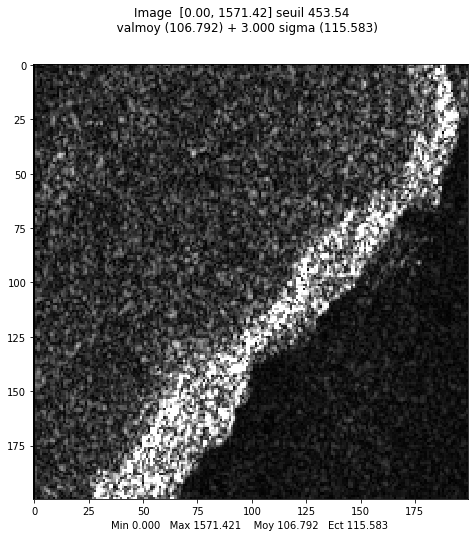

array([[ 0.        , 66.61080993, 22.20360331, ..., 21.09502311,
        47.01063709, 22.84731932],
       [ 0.        , 36.76955262, 19.02629759, ..., 53.82378656,
        78.33900689, 29.06888371],
       [ 0.        , 78.23042886, 53.07541804, ..., 56.08921465,
        82.73451517, 63.13477647],
       ...,
       [ 0.        , 48.50773134, 59.94163828, ..., 31.06444913,
         3.        , 35.80502758],
       [ 0.        , 78.23042886, 55.03635162, ..., 27.16615541,
        16.97056275, 32.69556545],
       [ 0.        , 93.47726996, 11.66190379, ..., 26.92582404,
        15.62049935, 19.02629759]])

In [30]:
#take a subpart of the image to highlight the phase shift
mvalab.visusar(imamaster[0][0:200, 0:200]) # to be completed
mvalab.visusar(imaslave[0][0:200, 0:200]) # to be completed

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 2048 x 2048


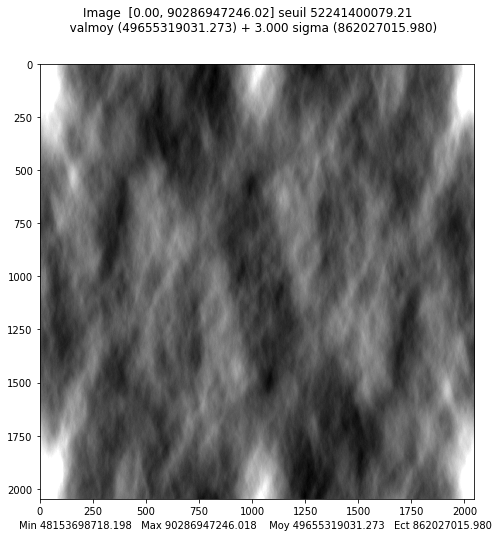

--- phase difference ---
(9, 12)


In [31]:
# compute cross-correlation 
ima1fft=np.fft.fft2(np.abs(imamaster[0]))
ima2fft=np.fft.fft2(np.abs(imaslave[0]))

imacorfft = np.multiply(np.conj(ima1fft), ima2fft) # to be completed
imacor=np.fft.ifft2(imacorfft)

mvalab.visusar(imacor)

# extract the index corresponding to the maximum value
i_offset=np.unravel_index(np.argmax(np.abs(imacor)), imacor.shape)
print('--- phase difference ---')
print(i_offset)

# compute the shift on the two axis
imaslaveroll = np.roll(imaslave[0], -i_offset[0], axis=0) # to be completed
imaslaveroll = np.roll(imaslaveroll, -i_offset[1], axis=1) # to be completed

### Question 2
Compute the interferogram by computing the hermitian product between the two registered images (pixel by pixel, 1-look interferogram). What do you see ?

We can see fringes, on montains and the canyon, these are due to 2 $\pi$ modulo in the phase and to the evolution of the altitude. Some parts are composed of white noise only. These area have no fringes because they are flat. We can guess were the river is, and we can also see the plateau on the left corner.

### Answer 2

Affichage d'une image reelle
plt.show dans visusar : image 2048 x 2048


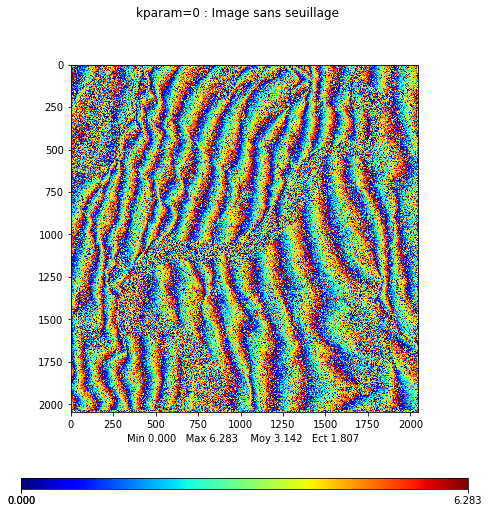

array([[3.14159265, 3.14159265, 4.49551536, ..., 1.02102588, 1.57717583,
        1.32877987],
       [6.28318531, 3.14159265, 4.69440666, ..., 1.77082558, 1.66060972,
        1.11735245],
       [3.14159265, 3.14159265, 4.44613693, ..., 3.44753425, 0.81775294,
        3.0437466 ],
       ...,
       [3.14159265, 1.14549143, 5.61813046, ..., 5.31814154, 4.5620658 ,
        1.98185293],
       [3.14159265, 6.28318531, 3.14159265, ..., 3.14159265, 3.14159265,
        3.14159265],
       [3.14159265, 3.14159265, 6.28318531, ..., 3.14159265, 3.14159265,
        3.14159265]])

In [32]:
# compute the interferogram and plot the interferometric phase
interfero = np.multiply(imamaster[0], np.conj(imaslaveroll)) # to be completed
mvalab.visuinterfero(np.angle(interfero)+math.pi,0)

### Orbital fringe correction: subpixellic registration
The two images are almost registered but in practice the ground cells are slightly different since they have not been taken under the exact same incidence angle.  

For an image with *n* columns, the phase shift is (see course)

$\Delta \phi = \frac{4\pi B_{orth} cos\theta}{\lambda R} n\Delta x$

with

$\Delta x = \frac{c}{2F_{e}sin\theta}$  


To take into account this phase shift for each pixel, apply a phase shift being the whole phase shift for the number of pixels in range of the image. 




```
phase_ramp=np.linspace(0.,phase_shift,ncol)
phase_line=np.exp(1j*phase_ramp)
imaslavefine=np.multiply(imaslaveroll,phase_line)
```


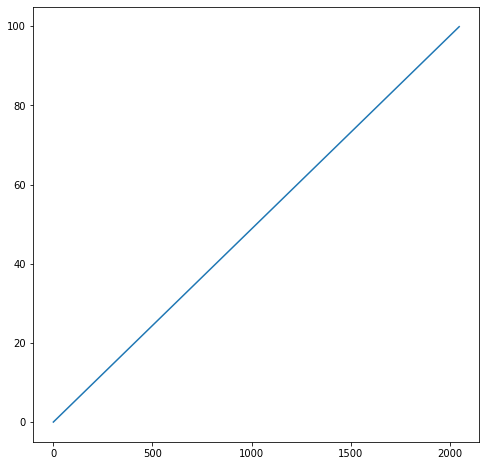

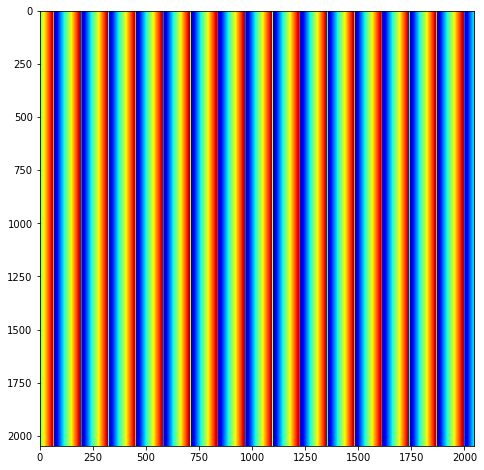

Affichage d'une image reelle
plt.show dans visusar : image 2048 x 2048


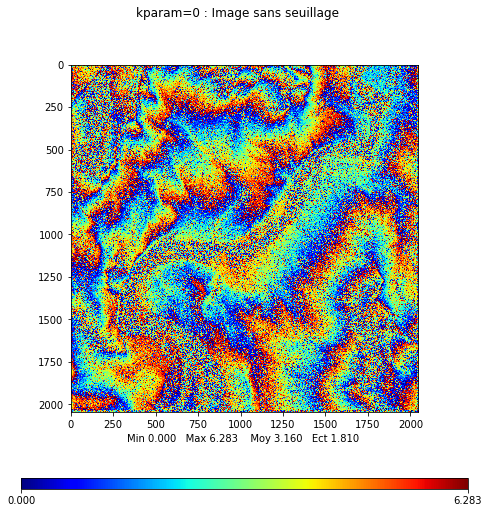

array([[3.14159265, 3.14159265, 4.39793725, ..., 1.77837116, 2.28573205,
        1.98854704],
       [6.28318531, 3.14159265, 4.59682854, ..., 2.52817086, 2.36916594,
        1.77711961],
       [3.14159265, 3.14159265, 4.34855882, ..., 4.20487953, 1.52630916,
        3.70351377],
       ...,
       [3.14159265, 1.09670237, 5.52055235, ..., 6.07548682, 5.27062202,
        2.6416201 ],
       [3.14159265, 6.28318531, 3.14159265, ..., 3.14159265, 3.14159265,
        3.14159265],
       [3.14159265, 3.14159265, 6.28318531, ..., 3.14159265, 3.14159265,
        3.14159265]])

In [33]:
# Parameters of the sensor
theta = 39.15*np.pi/180 #rad
lambd = 3.11e-2 #m
Fe = 109.89e6 #Hz
Borth = 46.5 #m
R = 646e3 #m
c = 3e8 #m/s

# Compute the phase shift
delta_x = c/(2*Fe*np.sin(theta)) # to be completed
delta_theta = Borth/R
phase_shift = 4*np.pi*Borth*np.cos(theta)*ncol*delta_x/(lambd*R) # to be completed


# Compute the phase shift for each image pixel
phase_ramp=np.linspace(0.,phase_shift,ncol)

plt.figure()
plt.plot(phase_ramp)
plt.show()

phase_line=np.exp(1j*phase_ramp)

# Visualize the orbital fringes
orbital_fringes = np.ones((imamaster[0].shape), dtype=np.complex128)
for juv in range(imamaster[2]):
    orbital_fringes[juv,:]= phase_line
plt.figure()
plt.imshow(np.angle(orbital_fringes),cmap='jet')
plt.show()

# Register the slave image
imaslavefine = np.multiply(imaslaveroll, phase_line) # to be completed

#compute the new interferogram and comment the effect of the fine registration
interferogram_corrected = np.multiply(imamaster[0], np.conj(imaslavefine)) # to be completed
mvalab.visuinterfero(np.angle(interferogram_corrected)+math.pi,0) # to be completed

### Question 3
Compute the interferogram by computing the hermitian product between the two finely registered images (pixel by pixel, 1-look interferogram). What do you see ?


### Answer 3

Given that we have supressed orbital fringes, there are fewer fringes compared to the previous result. We can count the fringes to compute the altitude information. The interferogram is noisy, we need to filter it.

### Computation of the filtered interferogram
To compute now the interferometric product, you have to compute the multi-look hermitian product given by the formula :

$d(i,j)= {\gamma(i,j) e}^{j \phi(i,j)}$

$d(i,j)=\frac{\sum_{(i',j') \in {{V}}(i,j)} I_m(i',j')I_s^*(i',j')}
{
\sqrt{\sum_{(i',j') \in {{V}}(i,j)} I_m(i',j')I_m^*(i',j')} 
\sqrt{\sum_{(i',j') \in {{V}}(i,j)} I_s(i',j')I_s^*(i',j')} } 
$

the usual neighborhood is a square of size 3$\times$3 pixels. 
It gives :
- the interferometric phase (argument of the output, $\phi(i,j)$)
- the coherence (modulus of the output $\gamma(i,j)$ ) reflecting the quality of the interferometric phase


### Question 4
Compute and compare the interferometric product for the two images (master and slave) in the following cases:
- using the raw images, without any correction
- with the pixellic registration
- with the sub-pixellic phase shift 

You can fill the python function "interferogramme" to compute the complex interferogram.

Comment the differences between the three inteferograms.
Try to modify the size of window used to compute the multilooked interferogram and explain what happens.

### Answer 4

With sub_pixellic phase shift, the interferogramme is not noisy anymore. With a window 5x5, it is really easy to count the fringer and to separate flat area like the river or the plateau from mountains. If the window is too small, the interferogramme is still noisy. With a too large window, we might loose the noise on flat area, and therefore information.
With the pixellic registration, we can still see the interferogramme but it is noisy. With ithour any registration, the interferogram is only white noise, and no information can be retrieved.

In [34]:
def interferogramme( tabvignette, tabvignette2, *therest) :
    """
    Computation of the complex interferogram between two images of the
    same size.
    By default, window size is set as 3x3 (dimx, dimy).
    It outputs a complex image, whose modulus is the coherence and whose phase 
    is the interferometric phase.
    """
    
    dimx=3
    dimy=3
    
    if(len(therest)==1):        
        dimx=therest[0]
        dimy=dimx
        
    if(len(therest)==2):       
        dimx=therest[0]
        dimy=therest[1]
    
    nlig=np.size(tabvignette,0)
    ncol=np.size(tabvignette,1)
    
    if nlig != np.size(tabvignette2,0)  :
        print(u'les deux images doivent avoir la même taille (%d  et %d)'%(nlig, np.size(tabvignette2,0)))
        return 0
    
    if ncol != np.size(tabvignette2,1)  :
        print(u'les deux images doivent avoir la même taille')
        return 0
    
    interf= np.multiply(tabvignette, np.conj(tabvignette2))

    # part to be completed to compute a multi-look interfergram by averaging on a local window
    
    
    mask = np.ones((dimy, dimx))/(dimx * dimy) # to be completed
    interfiltr = signal.convolve2d(interf, mask, mode='same') # to be completed
    
    den1 = np.sqrt(signal.convolve2d(np.multiply(tabvignette, np.conj(tabvignette)), mask, mode='same')) # to be completed
    den2 = np.sqrt(signal.convolve2d(np.multiply(tabvignette2, np.conj(tabvignette2)), mask, mode='same')) # to be completed
 
    return interfiltr/(den1*den2+1e-12)

Affichage d'une image reelle
plt.show dans visusar : image 2048 x 2048


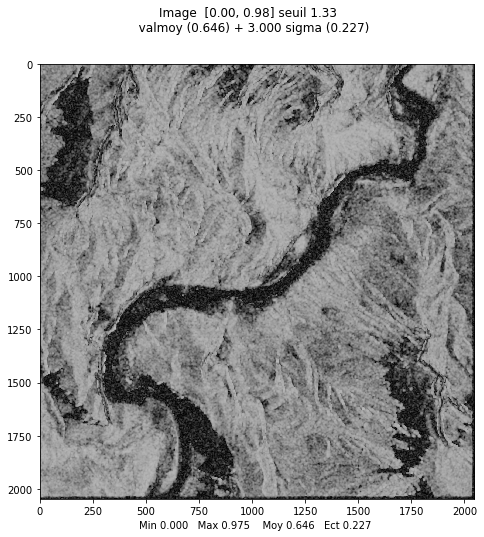

Affichage d'une image reelle
plt.show dans visusar : image 2048 x 2048


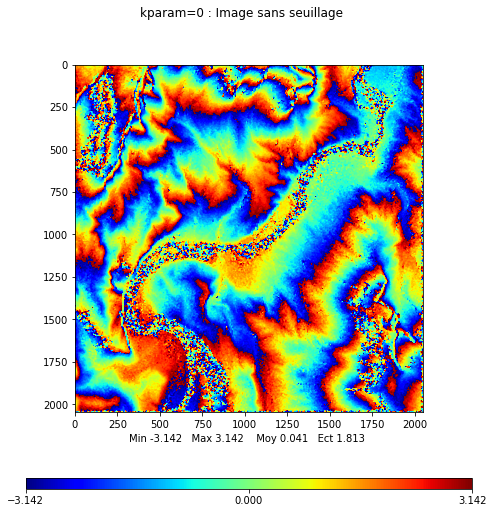

array([[ 1.6386615 ,  1.54918175,  1.54533182, ..., -0.673192  ,
        -0.79872192, -0.88044838],
       [ 1.54960587,  1.49335615,  1.49136574, ..., -0.63659109,
        -0.74285511, -0.83281289],
       [ 1.63901564,  1.55186424,  1.5398478 , ..., -0.76269259,
        -0.8391189 , -0.92630803],
       ...,
       [ 2.58664438,  2.65088891,  2.47383854, ..., -1.51665206,
         0.71257197, -1.88265913],
       [ 2.43147073,  2.50170287,  2.33078066, ..., -1.18340029,
         1.20625821,  1.17623014],
       [ 2.39506548,  2.46287451,  2.24071963, ..., -1.49385246,
         1.02197639, -3.05035718]])

In [35]:
interf=interferogramme(imamaster[0], imaslavefine, 10, 10) # here you can modify the size of the local window

mvalab.visusar(np.abs(interf))
mvalab.visuinterfero(np.angle(interf),0)

Affichage d'une image reelle
plt.show dans visusar : image 2048 x 2048


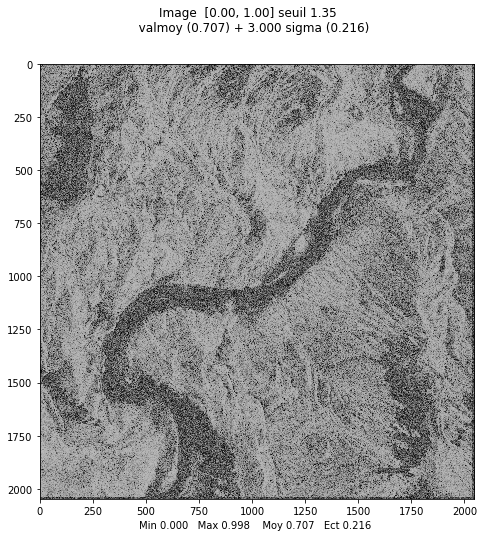

Affichage d'une image reelle
plt.show dans visusar : image 2048 x 2048


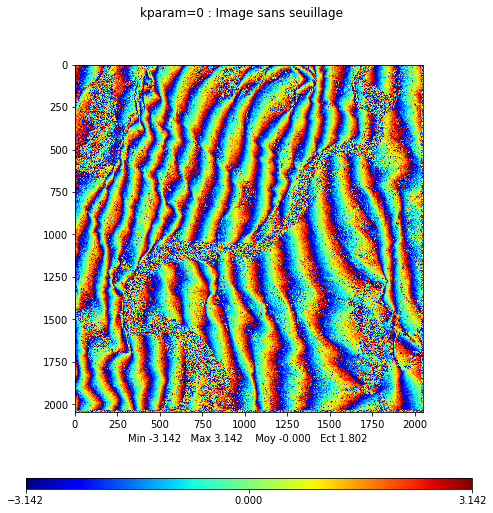

Affichage d'une image reelle
plt.show dans visusar : image 2048 x 2048


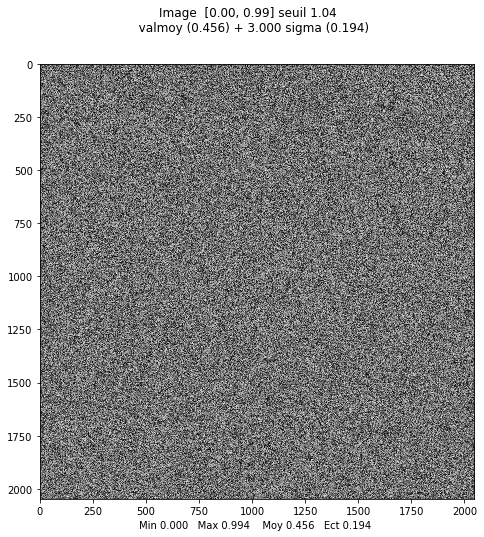

Affichage d'une image reelle
plt.show dans visusar : image 2048 x 2048


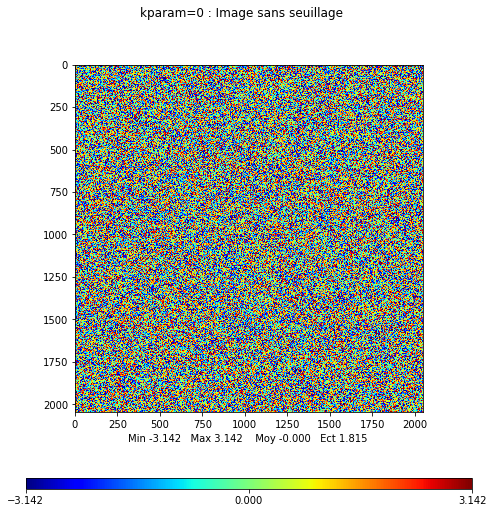

array([[ 0.        ,  0.54835397,  3.0476256 , ..., -2.29368518,
        -2.21914933, -2.23991916],
       [ 0.        ,  0.74544565, -2.9341467 , ..., -2.26343316,
        -2.39939613, -2.41914591],
       [ 0.        ,  1.13481617,  2.41132773, ..., -2.03884836,
        -2.53144147, -2.52602514],
       ...,
       [ 0.66775223,  0.2672437 ,  2.27475407, ...,  2.45002263,
         2.23447572,  2.10341983],
       [ 0.45969506,  0.00930104,  2.20776218, ...,  2.51688358,
         2.30410144,  2.39153075],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [36]:
# COMPUTE THE COHERENCY on the image without subpixellic registration
interfnoramp=interferogramme(imamaster[0], imaslaveroll)

mvalab.visusar(np.abs(interfnoramp))
mvalab.visuinterfero(np.angle(interfnoramp),0)

# COMPUTE THE COHERENCY on the image without any registration
interfnoramp=interferogramme(imamaster[0], imaslave[0])

mvalab.visusar(np.abs(interfnoramp))
mvalab.visuinterfero(np.angle(interfnoramp),0)


### Question 5
Interpreting the fringes

When taking into account the phase shift due to pixel size differences, what do the left fringes 
correspond to ? 

Compute the ambiguity height given by :
    
$h_{amb} = \frac{\lambda R \: \sin \theta}{ 2 B_{ortho} }$

For TerraSAR-X images, the acquisitions are instead done simultaneously thanks to the [tandem configuration](https://earth.esa.int/web/eoportal/satellite-missions/t/tandem-x): thus, we are in a single-pass interferometer configuration, avoiding temporal decorrelation. In this case, the ambiguity height is:

$h_{amb} = \frac{\lambda R \: \sin \theta}{ B_{ortho} }$

Which mean depth of the Grand Canyon can be deduced from the interferogram ? Explain. The mean depth of the Grand Canyon is of approximately 1000m





------
There is low coherence on the water, because the area is flat. Therefore the phase on the river is just a noisy phase. We can count the number of fringes from the river to the plateau to estimate the depth of th Grand Canyon because each fringe implies a shif of 2 $\pi$ in phase. 


With Multi-pass : 
$\Delta \phi_1 = 2R_1/\lambda + \Delta \phi_p $

$\Delta \phi_2 = 2R_2/\lambda + \Delta \phi_p $

$\begin{align*}
\Delta \phi &= \Delta \phi_2 - \Delta \phi_1 \\
&= 2 * 2\pi \delta / \lambda \\
&= \frac{4\pi B_{orth} h}{\lambda R sin(\theta)}
\end{align*}$

With Mono-pass : 
$\Delta \phi_1 = 4 \pi R_1/\lambda + \Delta \phi_p $

$\Delta \phi_2 = 2 \pi (R_1 + R_2)/ \lambda$

$\begin{align*}
\Delta \phi &= \Delta \phi_2 - \Delta \phi_1 \\
&= 2\pi (R_2 - R_1) / \lambda \\
\end{align*}$

The number of fringes * the altitude of ambiguity give the depth of the grand Canyon.

### Answer 5

On observe 4 fringes, ce qui donne 1091m. 

In [42]:
hamb = lambd * R * np.sin(theta) /Borth # to be completed
print(hamb)

grand_canyon_height = hamb * 4 # to be completed
print(grand_canyon_height)

272.7797090807584
1091.1188363230335


## C. BONUS PART: ERS data of Etna (SARedu data)

The following parameters have to be used for these data:
- $\theta = 20^{\rm o}$ (on est en ``near range'')
-  $R$ = 826 km  (hypothèse de Terre sphérique)
-  $\lambda$ = 5.66 cm
-  $B_{ortho}$ = -54.5 m
-  $F_e$ = 18.96 MHz

Do the same processing as before with these new data. 


In [43]:
from google_drive_downloader import GoogleDriveDownloader as gdd

In [44]:
# use the previous steps to process Etna data
gdd.download_file_from_google_drive(file_id='1MKeUpH3ovVG9hjfEY2UVl6InwswFKpC2',
                                    dest_path='./interfero.zip',
                                    unzip=True)


In [45]:
imageM='./interfero/Master.mat'
imageS='./interfero/Slave.mat'
imamaitre=mvalab.matlab2imz(imageM,'Master')
imaslave=mvalab.matlab2imz(imageS,'Slave')

ncolonnes=imamaitre[1]
nlignes=imamaitre[2]

#%%

mvalab.visusar(imamaitre[0])
mvalab.visusar(imaslave[0])

Erreur dans le nom du .mat
Erreur dans le nom du .mat
Pas de visualisation : Tableau nul
Pas de visualisation : Tableau nul


### Pixellic registration

In [41]:
ima1fft=np.fft.fft2(np.abs(imamaitre[0]))
ima2fft=np.fft.fft2(np.abs(imaslave[0]))

# using the multiplication in the Fourier domain, compute the FFT of the correlation and then the correlation by inverse FFT
imacorfft = ... # to be completed
imacor= ... # to be completed

#visualize the correlation image (maximum gives the translation value)
mvalab.visusar(imacor)

# extract the index corresponding to the maximum value
idecalage=np.unravel_index(np.argmax(np.abs(imacor)), imacor.shape)
print('--- phase shift ---')
print(idecalage)

# compute the shift on the two axis
imaslaveroll=np.roll(imaslave[0], -idecalage[0], axis=0)
imaslaveroll=np.roll(imaslaveroll, -idecalage[1], axis=1)

# compute the interferogram and plot the interferometric phase
interfero= ... # to be completed

mvalab.visuinterfero(np.angle(interfero)+math.pi,0)
mvalab.visusarspectre(imamaitre[0])

IndexError: ignored

### BONUS: Question 6
What is the pixel phase shift in this case ?

### Subpixellic registration

In [ ]:
theta = 20/180*np.pi #rad
lambd = 0.0566 #m
Borth = 54.5 #m
R = 826000 #m
c = 299792458 #m/s
Fe = 18.96*1e6 #Mhz

# Compute the global phase shift
delta_x = ... # to be completed
ncolonnes=imamaitre[1]
dephasage_glob = ... # to be completed

# compute the phase shift for each pixel and plot it
rampephase=np.linspace(0.,dephasage_glob,ncolonnes)
plt.figure()
plt.plot(rampephase)
plt.show()

malignephase=np.exp(1j*rampephase)

# Visualize the orbital fringes
orbital_fringes = np.ones((imamaitre[0].shape), dtype=np.complex128)
for juv in range(imamaitre[2]):
    orbital_fringes[juv,:]= malignephase
plt.figure()
plt.imshow(np.angle(orbital_fringes),cmap='jet')
plt.show()

# Compensate the orbital fringe contribution by multiplying the registered slave image with malignephase
imaslavefine= ... # to be completed

### Computation of the filtered interferogram


In [ ]:
interf= ... # to be completed

mvalab.visusar(np.abs(interf))
mvalab.visuinterfero(np.angle(interf),0)

### BONUS: Question 7
What is the ambiguity height ? In this case, we are in a multi-pass interferometer configuration.


### BONUS: Question 8
Which altitude do you find for Etna mount using your interferogram ? How did you retrieve it ? The altitude is of approximately 3000m. 

### BONUS: Question 9
Which are the areas of low coherence ? Explain why.